In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df1 = pd.read_excel("newedge2.xlsx", sheet_name='区域')
df2 = pd.read_excel("newedge2.xlsx", sheet_name='城市群')
df3 = pd.read_excel("newedge2.xlsx", sheet_name='核心城市')

In [39]:
def name(df):
    name = []
    value = []
    for i in range(len(df)):
        city = df.loc[i,"name"]
        name.append(city)
    return name

In [40]:
def value(df,name):
    cols = []
    for i in name:
        col=df.loc[:,[i]][i].values.tolist()
        cols.append(col)
    cols = np.array(cols)
    cols = np.trunc(cols)
    return cols

In [46]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

[Text(0, 0, '0.0'),
 Text(1, 0, '0.0'),
 Text(2, 0, '1222.0'),
 Text(3, 0, '0.0'),
 Text(0, 1, '1848.0'),
 Text(1, 1, '0.0'),
 Text(2, 1, '0.0'),
 Text(3, 1, '0.0'),
 Text(0, 2, '1222.0'),
 Text(1, 2, '1957.0'),
 Text(2, 2, '0.0'),
 Text(3, 2, '1699.0'),
 Text(0, 3, '1773.0'),
 Text(1, 3, '0.0'),
 Text(2, 3, '0.0'),
 Text(3, 3, '0.0')]

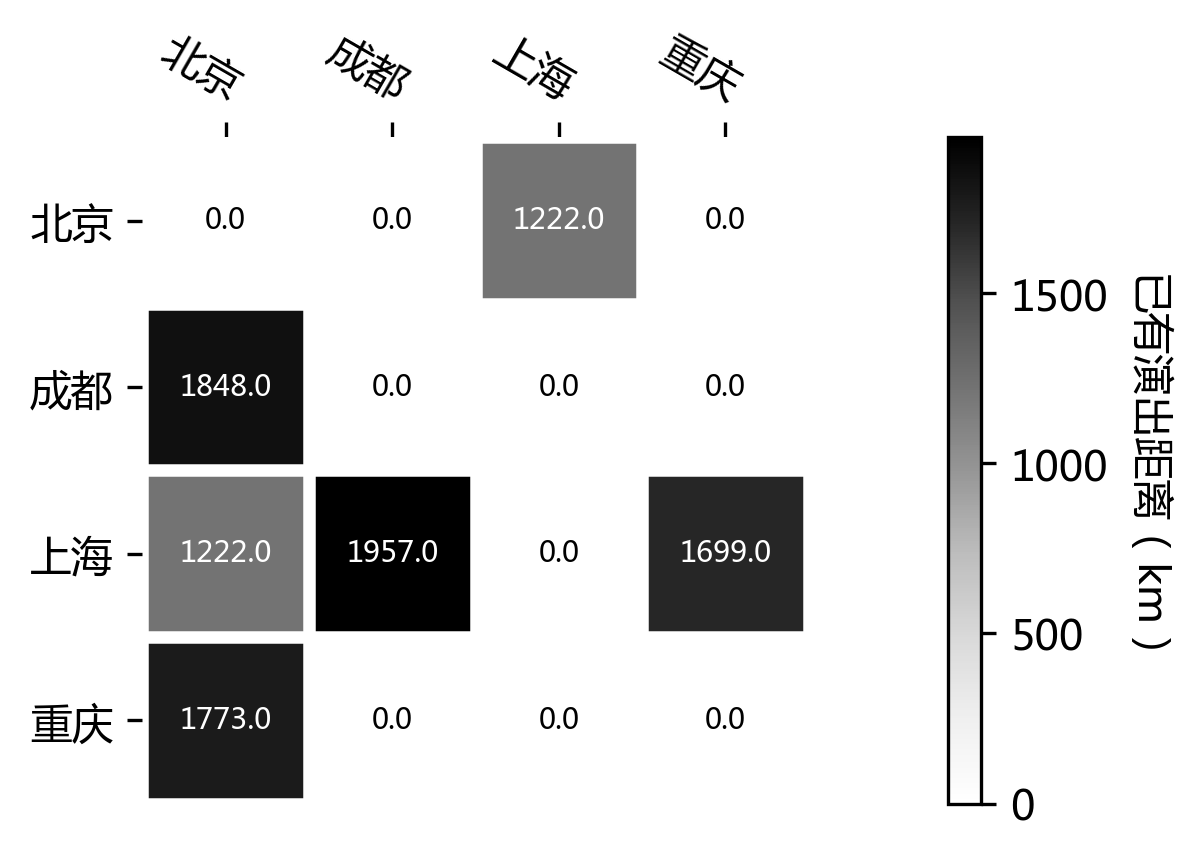

In [31]:
fig = plt.figure(figsize=(12,10),dpi=300)
ax = fig.add_subplot(3,1,1)

im, _ = heatmap(cols, name, names, ax=ax,
                cmap="Greys", cbarlabel="已有演出距离（km）")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)